In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

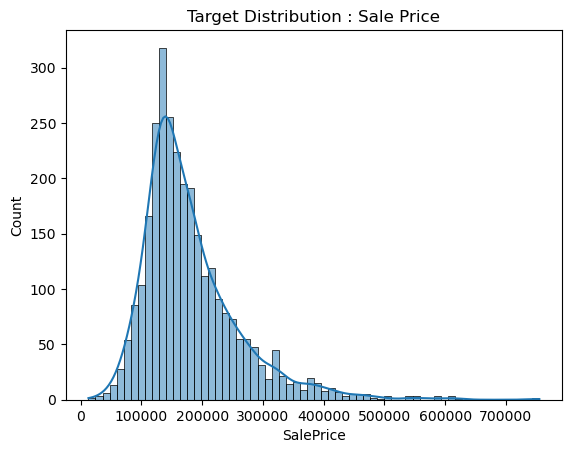

In [4]:
sns.histplot(df['SalePrice'] , kde = True)
plt.title('Target Distribution : Sale Price')
plt.show()

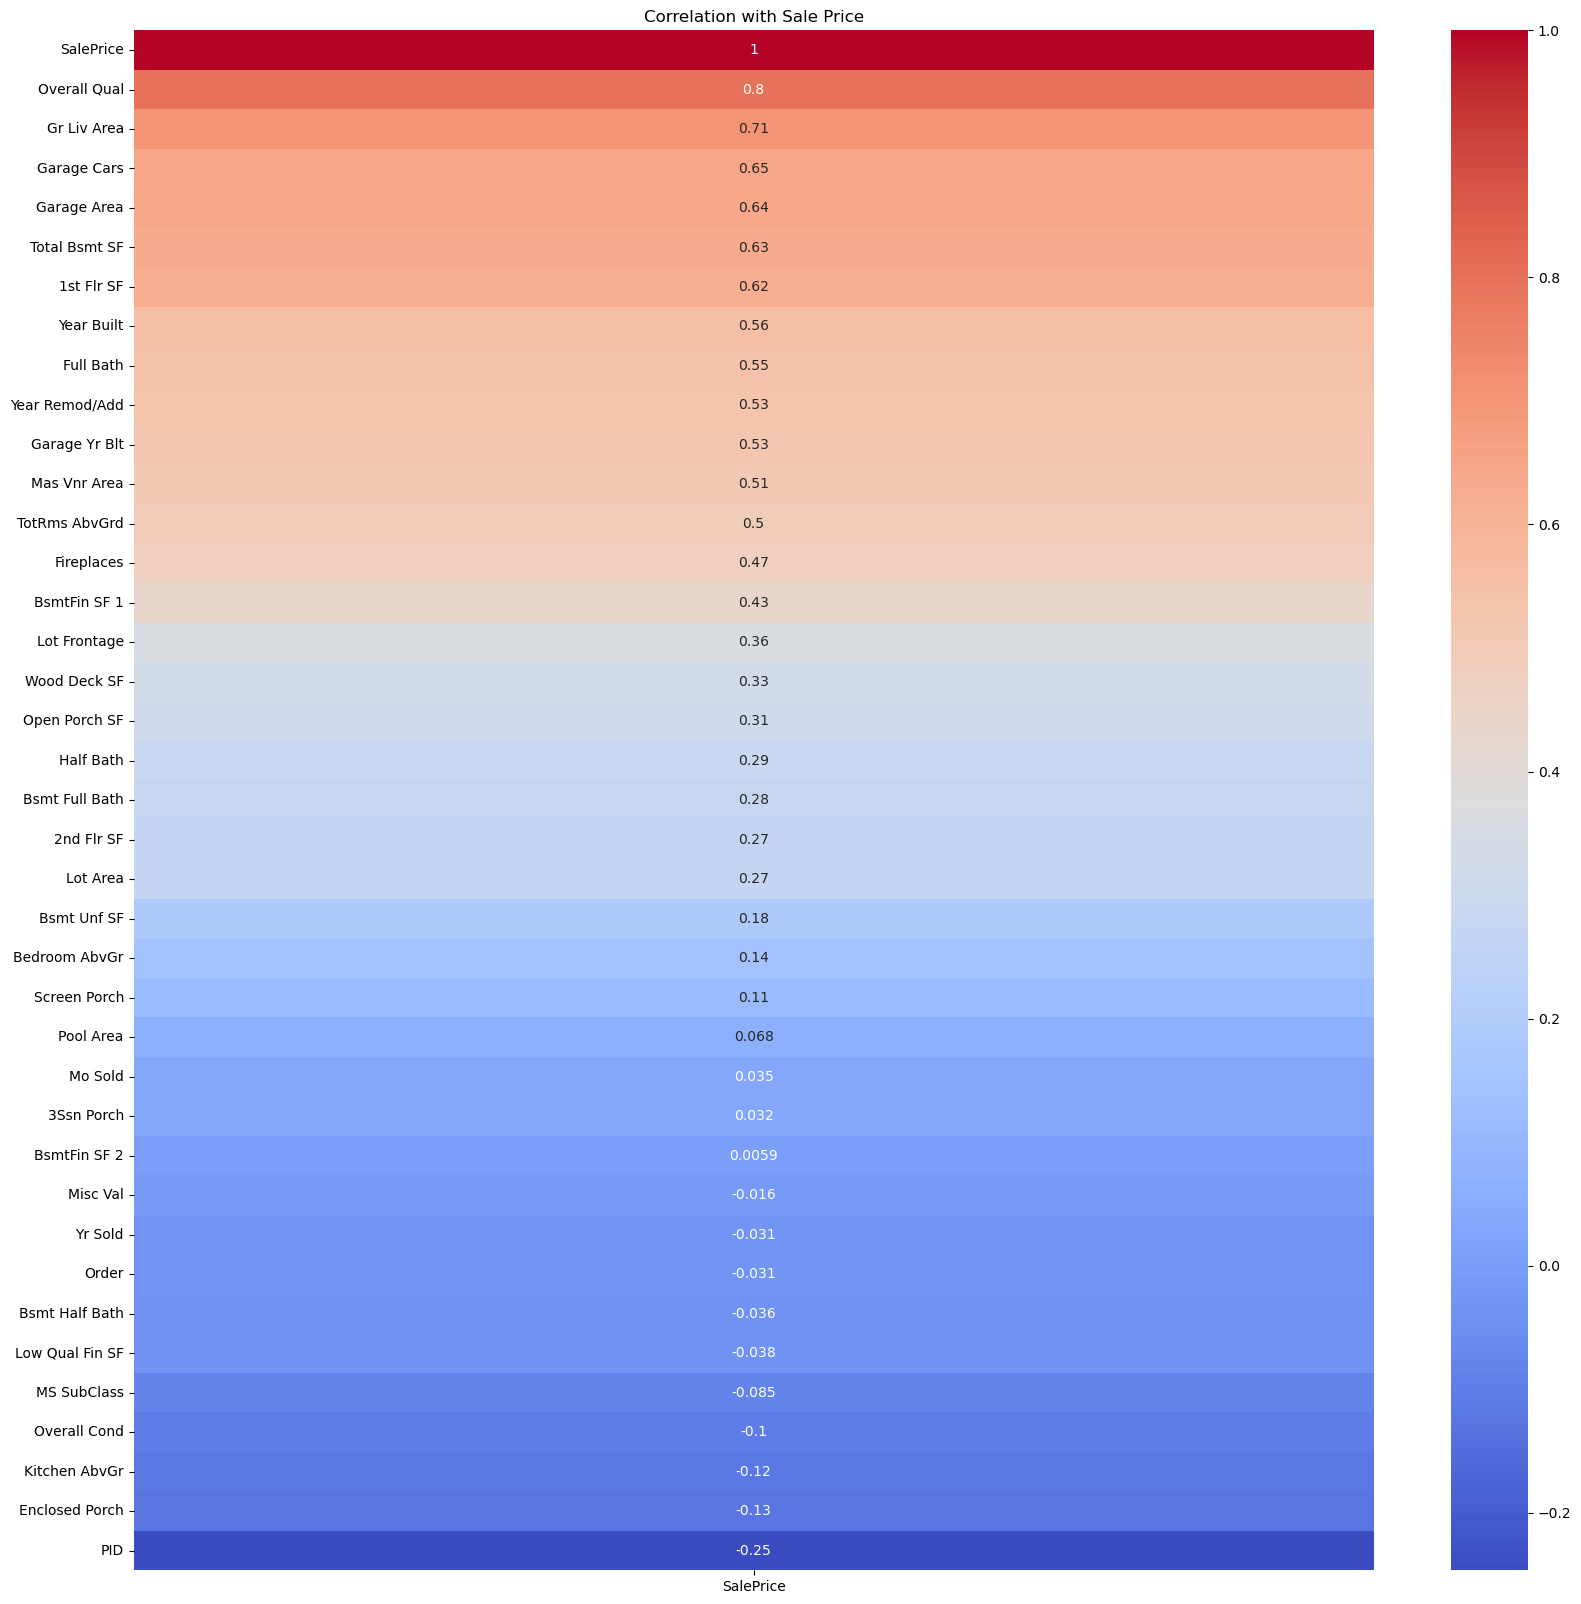

In [5]:
corrmat = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat , annot=True , cmap = 'coolwarm')
plt.title('Correlation with Sale Price')
plt.show()

In [6]:
corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(corr.head(5))
print(corr.tail(5))

SalePrice       1.000000
Overall Qual    0.799262
Gr Liv Area     0.706780
Garage Cars     0.647877
Garage Area     0.640401
Name: SalePrice, dtype: float64
MS SubClass      -0.085092
Overall Cond     -0.101697
Kitchen AbvGr    -0.119814
Enclosed Porch   -0.128787
PID              -0.246521
Name: SalePrice, dtype: float64


In [7]:
df['Overall Qual'].unique()

array([ 6,  5,  7,  8,  9,  4,  3,  2, 10,  1])

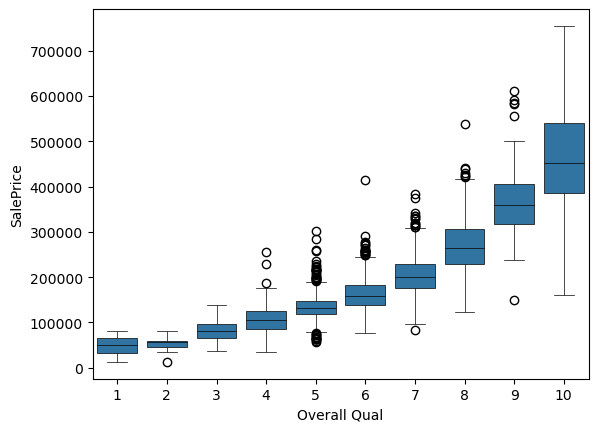

In [8]:
sns.boxplot(x = df['Overall Qual'],y = df['SalePrice'],fill=True,linecolor='black',linewidth=0.5)
plt.show()

In [9]:
df['Gr Liv Area']

0       1656
1        896
2       1329
3       2110
4       1629
        ... 
2925    1003
2926     902
2927     970
2928    1389
2929    2000
Name: Gr Liv Area, Length: 2930, dtype: int64

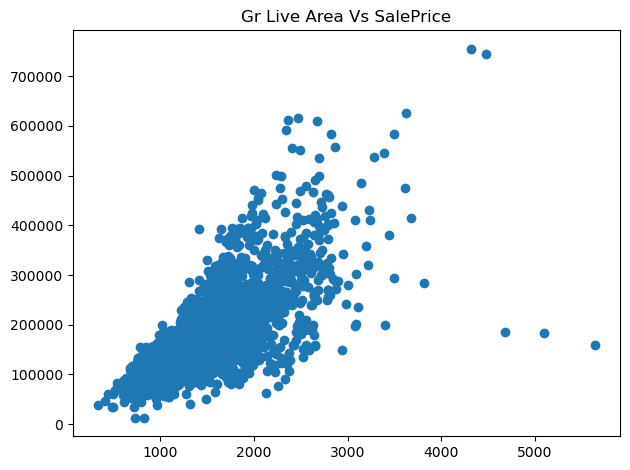

In [10]:
plt.scatter(x = df['Gr Liv Area'] , y = df['SalePrice'])
plt.title('Gr Live Area Vs SalePrice')
plt.tight_layout()
plt.show()

In [11]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [13]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [14]:
categorical_columns = df.select_dtypes(include = ['object']).columns
numerical_columns = df.select_dtypes(exclude = ['object']).columns

In [15]:
df[categorical_columns] = df[categorical_columns].fillna("None")
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [16]:
df.isna().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [17]:
X = df.drop('SalePrice' , axis = 1)
y = df['SalePrice']
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)


In [20]:
processor_linear = ColumnTransformer(
    transformers=[
        ('nums' , StandardScaler() , numerical_cols),
        ('cat' , OneHotEncoder(handle_unknown='ignore') , categorical_cols)]
)

In [21]:
def label_encode_dataframe(df, categorical_cols):
    df_copy = df.copy()
    for col in categorical_cols:
        le = LabelEncoder()
        df_copy[col] = le.fit_transform(df_copy[col].astype(str))
    return df_copy

# Apply to training & test
X_train_tree = label_encode_dataframe(X_train, categorical_cols)
X_test_tree = label_encode_dataframe(X_test, categorical_cols)


In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [23]:
lr = Pipeline(steps = [
    ('Preprocessor',processor_linear),
    ('model',LinearRegression())])

ridge = Pipeline(steps = [
    ('Preprocessor' ,processor_linear),
    ('model',Ridge())])
ridge_params = {
    'model__alpha' : [0.01,0.1,1,10,100]}
ridge_grid = GridSearchCV(ridge , param_grid= ridge_params , cv = 5 , scoring = 'r2')

lasso = Pipeline(steps = [
    ('Preprocessor', processor_linear),
    ('model' ,Lasso(max_iter=5000))])
lasso_params = {
    'model__alpha' : [0.01,0.1,1,10,100]}
lasso_grid = GridSearchCV(lasso , param_grid = lasso_params , cv = 5 , scoring = 'r2' )



In [37]:
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
dt_grid = GridSearchCV(dt, param_grid=dt_params, cv=5, scoring='r2', n_jobs=-1)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'criterion': ['squared_error']
}
rf_grid = GridSearchCV(rf, param_grid=rf_params, cv=3, scoring='r2', n_jobs=-1)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_features': [None, 'sqrt', 'log2']
}
gb_grid = GridSearchCV(gb, param_grid=gb_params, cv=3, scoring='r2', n_jobs=-1)

In [45]:
xg =xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xg_params = {
    "model__n_estimators": [100,200,300,500],
    "model__max_depth": [3,5,7,10],
    "model__learning_rate": [0.01,0.05,0.1],
    "model__subsample": [0.7,0.8,1.0],
    "model__colsample_bytree": [0.7,0.8,1.0]
}

xg_random = RandomizedSearchCV(xg, xg_params, n_iter=20, cv=5, scoring="r2", random_state=42)

In [47]:
models = {
    "Linear Regression": lr,
    "Ridge": ridge_grid,
    "Lasso": lasso_grid,
   
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, rmse, mae])


results_df = pd.DataFrame(results, columns=["Model","R2","RMSE","MAE"])
print(results_df)


Training Linear Regression...
Training Ridge...
Training Lasso...


C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+11, tolerance: 9.926e+08
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e+11, tolerance: 9.784e+08
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features 

               Model        R2          RMSE           MAE
0  Linear Regression  0.896556  26965.809578  15536.514651
1              Ridge  0.898688  26686.476875  16053.927609
2              Lasso  0.903744  26012.063635  15320.834089


In [49]:
models = {
    "Decision Tree": dt_grid,
    "Random Forest": rf_grid,
    "Gradient Boosting": gb_grid,
    "XGBoost": xg_random
}

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_tree, y_train)
    y_pred = model.predict(X_test_tree)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, rmse, mae])

# Convert to DataFrame
results_df_1 = pd.DataFrame(results, columns=["Model","R2","RMSE","MAE"])
print(results_df)


Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_depth", "model__n_estimators", "model__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_depth", "model__n_estimators", "model__subsample" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Omdes\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [12:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "model__colsample_bytree", "model__learning_rate", "model__max_dept

               Model        R2          RMSE           MAE
0      Decision Tree  0.807550  36780.629228  24347.879090
1      Random Forest  0.909579  25211.312763  15360.337042
2  Gradient Boosting  0.910056  25144.613308  15470.635015
3            XGBoost  0.909665  25199.295228  15901.823242


In [50]:


final_results = pd.concat([results_df, results_df_1], ignore_index=True)


In [51]:
final_results

,Model,R2,RMSE,MAE
0,Decision Tree,0.807550,36780.629228,24347.879090
1,Random Forest,0.909579,25211.312763,15360.337042
2,Gradient Boosting,0.910056,25144.613308,15470.635015
3,XGBoost,0.909665,25199.295228,15901.823242
4,Decision Tree,0.807550,36780.629228,24347.879090
5,Random Forest,0.909579,25211.312763,15360.337042
6,Gradient Boosting,0.910056,25144.613308,15470.635015
7,XGBoost,0.909665,25199.295228,15901.823242


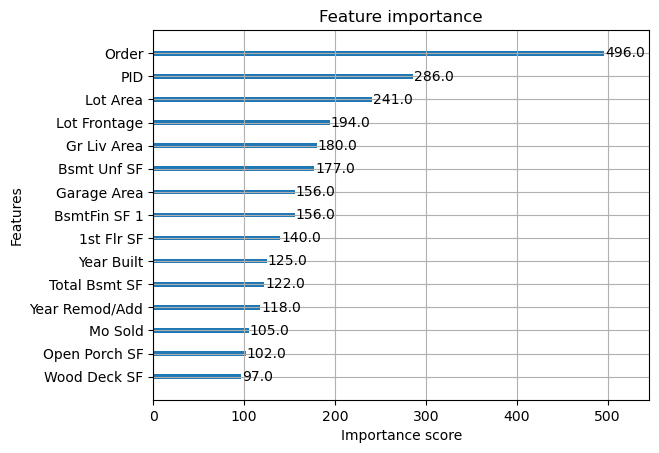

In [54]:

from xgboost import plot_importance

best_xg = xg_random.best_estimator_

plot_importance(best_xg, importance_type="weight", max_num_features=15)
plt.show()
